In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
file_path='/content/drive/MyDrive/Assignments/WHR-2024-5CS037.csv'

In [343]:
data = pd.read_csv(file_path)
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [344]:
data_rows= data.shape[0]
data_columns= data.shape[1]
print(f"Number of rows: {data_rows}")
print(f"Number of columns: {data_columns}")

Number of rows: 143
Number of columns: 9


In [345]:
score_mean = data['score'].mean()
print(f"Mean of Score: {score_mean}")

score_median = data['score'].median()
print(f"Median of Score: {score_median}")

score_std = data['score'].std()
print(f"standard deviation of Score: {score_std}")

Mean of Score: 5.52758041958042
Median of Score: 5.785
standard deviation of Score: 1.1707165099442995


In [346]:
highest_happiness= data.loc[data['score'].idxmax(),'Country name']
lowest_happiness= data.loc[data['score'].idxmin(),'Country name']
print("The country with highest happiness score is :",highest_happiness)
print("The country with lowest happiness score is :",lowest_happiness)

The country with highest happiness score is : Finland
The country with lowest happiness score is : Afghanistan


In [347]:
missing_values = data.isnull().sum()
print("The missing value in data are :\n", missing_values)

The missing value in data are :
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [348]:
filtered_data= data[data['score']>7.5]
print("The counties with a score greater than 7.5 \n ",filtered_data)

The counties with a score greater than 7.5 
    Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [349]:
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False).head(10)
sorted_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [350]:
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

data['Happiness Category'] = data['score'].apply(categorize_happiness)
data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


<ipython-input-351-d7cd1b388362>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='viridis')


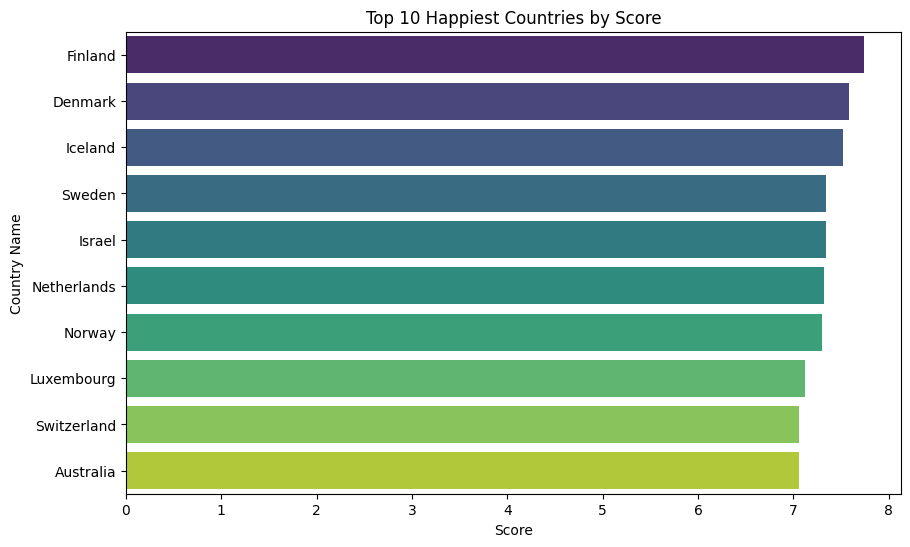

In [351]:
top_10_happiest = data.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country Name')
plt.show()

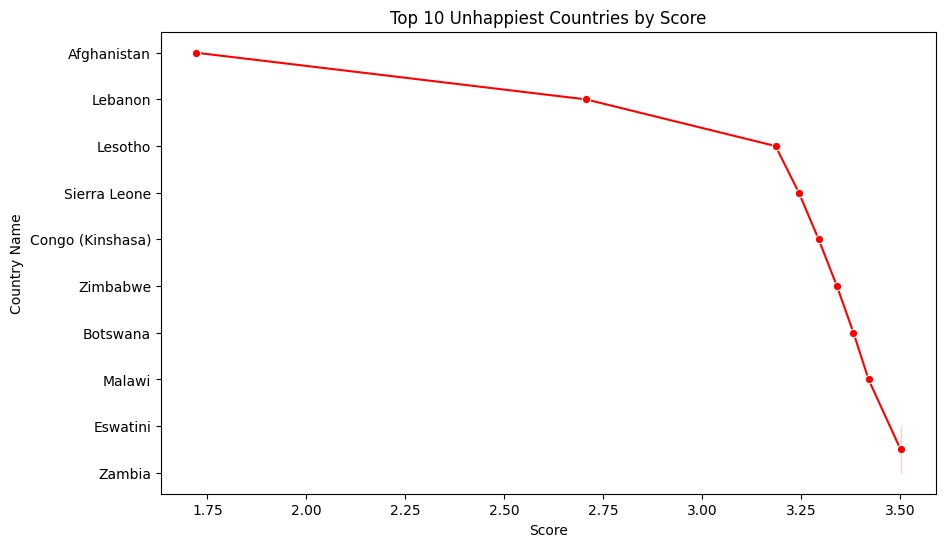

In [352]:
top_10_unhappiest = data.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_unhappiest, x='score', y='Country name', marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country Name')
plt.show()

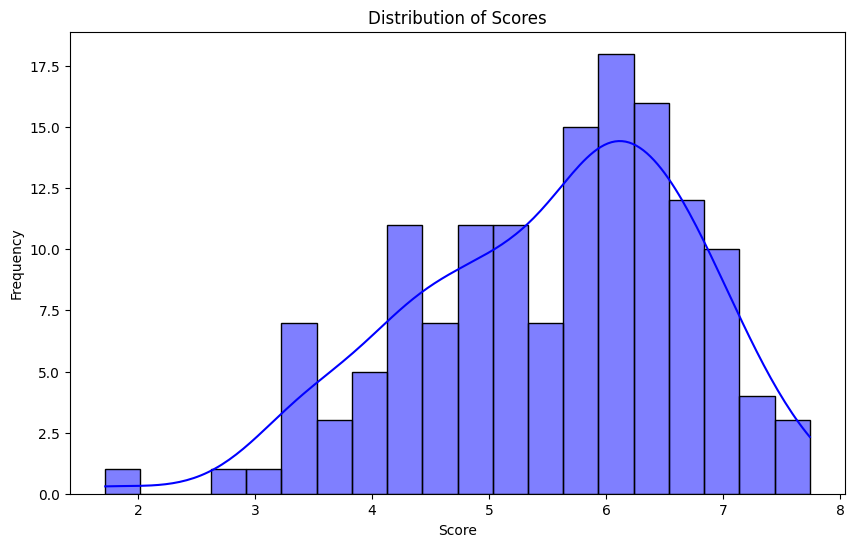

In [353]:

plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


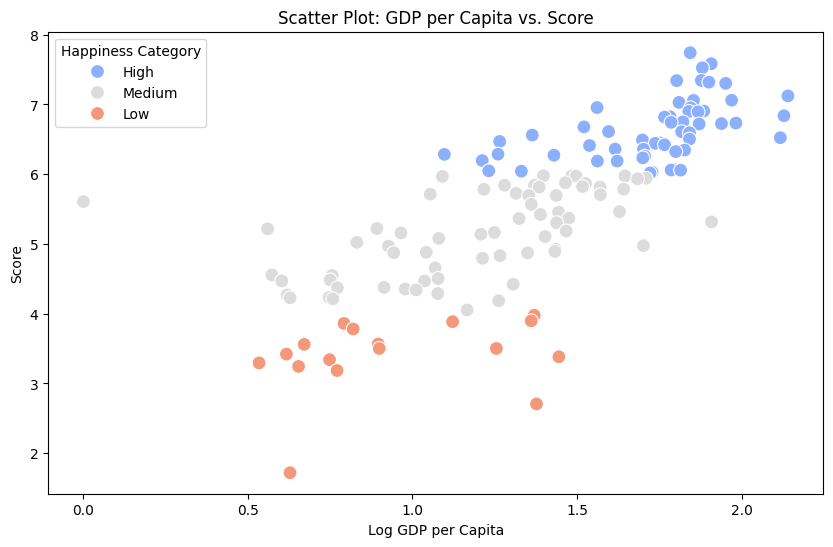

In [354]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Log GDP per capita', y='score', hue='Happiness Category', palette='coolwarm', s=100)
plt.title('Scatter Plot: GDP per Capita vs. Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend(title='Happiness Category')
plt.show()


In [355]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [356]:
fitered_south_asian_data= data[data['Country name'].isin(south_asian_countries)]
fitered_south_asian_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [357]:
south_asian_csv= fitered_south_asian_data.to_csv('south_asian_data.csv', index=False)

In [358]:
s_asian_data= pd.read_csv('/content/south_asian_data.csv')
print("The south asian coountries data : \n",s_asian_data)

The south asian coountries data : 
   Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual Happiness Category  
0                      0.115                1.783             Medium  
1                     

In [359]:
s_asian_data['Composite Score'] = 0.4 * s_asian_data['Log GDP per capita'] + 0.3 * s_asian_data['Social support'] + 0.3 * s_asian_data['Healthy life expectancy']
print(s_asian_data.head(10))

  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual Happiness Category  \
0                      0.115                1.783             Medium   
1                      0.074                1.907       

In [360]:
composite_score = s_asian_data.sort_values(by='Composite Score', ascending=False)
print("The top 5 countries using a horizontal bar chart showing the composite sorce\n",composite_score.head(5))

The top 5 countries using a horizontal bar chart showing the composite sorce
   Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
2        India  4.054               1.166           0.653   
1     Pakistan  4.657               1.069           0.600   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
2                    0.417                         0.767       0.174   
1                    0.321                         0.542       0.144   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual Happiness Category  \
0                      0.115                1.783 

<ipython-input-361-e72b1f19f020>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


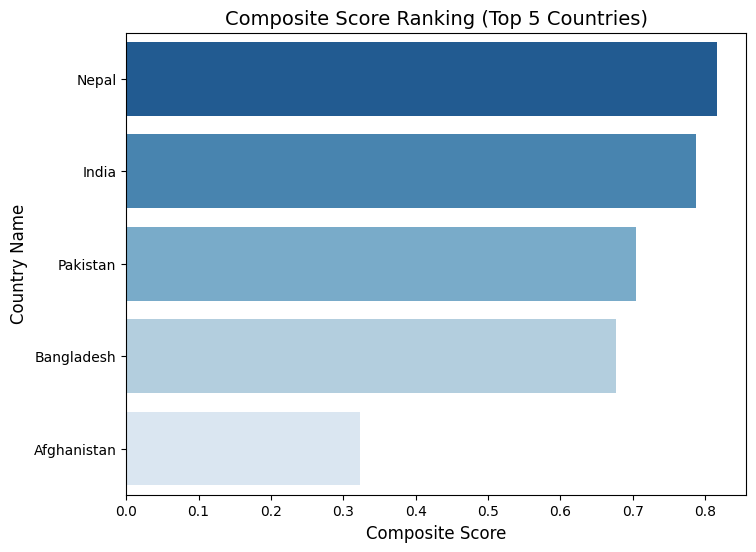

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

top_five = composite_score.nlargest(5, 'Composite Score')
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_five,
    y="Country name",
    x="Composite Score",
    palette="Blues_r"
)
plt.title("Composite Score Ranking (Top 5 Countries)", fontsize=14)
plt.xlabel("Composite Score", fontsize=12)
plt.ylabel("Country Name", fontsize=12)
plt.show()

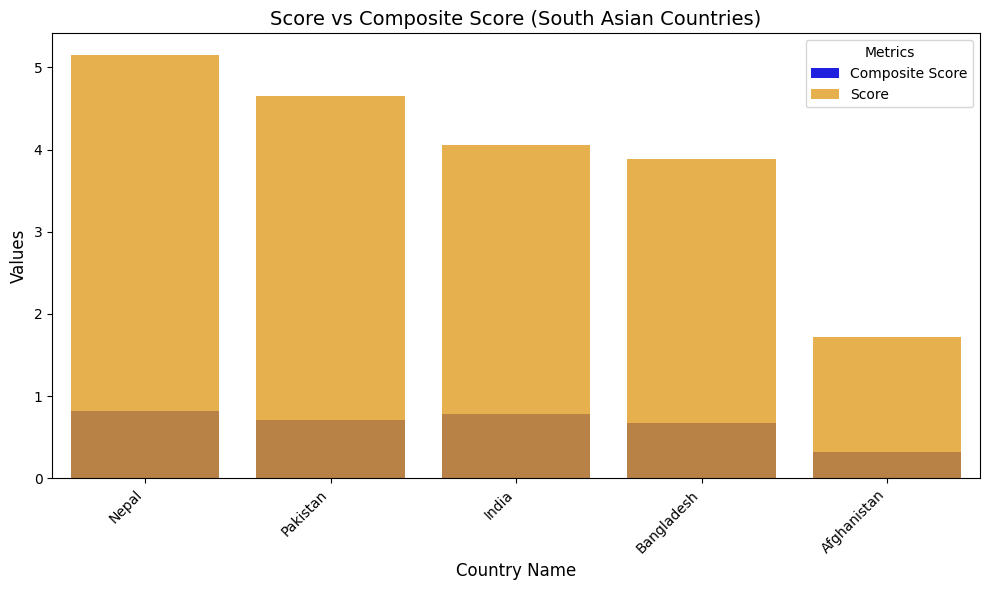

In [362]:
plt.figure(figsize=(10, 6))
x = range(len(s_asian_data))
width = 0.35
sns.barplot(x=s_asian_data["Country name"],y=s_asian_data["Composite Score"],color="blue",label="Composite Score")
sns.barplot(x=s_asian_data["Country name"],y=s_asian_data["score"],color="orange",alpha=0.8,label="Score")
plt.title("Score vs Composite Score (South Asian Countries)", fontsize=14)
plt.xlabel("Country Name", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title="Metrics", fontsize=10)
plt.tight_layout()
plt.show()

In [363]:
score_Q1= data['score'].quantile(0.25)
score_Q3= data['score'].quantile(0.75)
IQR= score_Q3-score_Q1
lower_bound= score_Q1-1.5*IQR
upper_bound= score_Q3+1.5*IQR
outliers_range= (lower_bound,upper_bound)
print("The range of the outliers are:",outliers_range)

The range of the outliers are: (2.1909999999999994, 8.951)


In [364]:
gdp_Q1= data['Log GDP per capita'].quantile(0.25)
gdp_Q3= data['Log GDP per capita'].quantile(0.75)
gdp_IQR= gdp_Q3-gdp_Q1
gdp_lower_bound= gdp_Q1-1.5*gdp_IQR
gdp_upper_bound= gdp_Q3+1.5*gdp_IQR
gdp_outlier_range= (gdp_lower_bound,gdp_upper_bound)
print("The range of the outliers are:",gdp_outlier_range)

The range of the outliers are: (0.08212499999999989, 2.7371250000000003)


In [365]:
s_asian_data['outlier'] = (
    (s_asian_data['score'] < outliers_range[0]) | (s_asian_data['score'] > outliers_range[1]) |
    (s_asian_data['Log GDP per capita'] < gdp_outlier_range[0]) | (s_asian_data['Log GDP per capita'] > gdp_outlier_range[1])
)

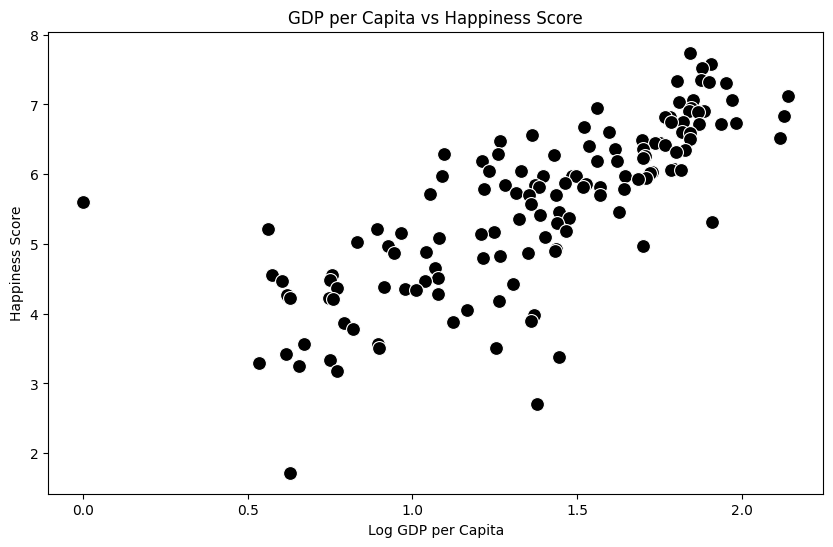

In [366]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, color='black', s=100)
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


In [367]:
s_asian_data['GDP-Score Gap'] = s_asian_data['Log GDP per capita'] - s_asian_data['score']

s_asia_sorted_asc = s_asian_data.sort_values('GDP-Score Gap', ascending=True)
s_asia_sorted_desc = s_asian_data.sort_values('GDP-Score Gap', ascending=False)


top_positive_gaps = s_asia_sorted_desc.head(3)
top_negative_gaps = s_asia_sorted_asc.head(3)
print("Top 3 Positive GDP-Score Gaps:")
print(top_positive_gaps)
print("\nTop 3 Negative GDP-Score Gaps:")
print(top_negative_gaps)

Top 3 Positive GDP-Score Gaps:
  Country name  score  Log GDP per capita  Social support  \
4  Afghanistan  1.721               0.628           0.000   
3   Bangladesh  3.886               1.122           0.249   
2        India  4.054               1.166           0.653   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
4                    0.242                         0.000       0.091   
3                    0.513                         0.775       0.140   
2                    0.417                         0.767       0.174   

   Perceptions of corruption  Dystopia + residual Happiness Category  \
4                      0.088                0.672                Low   
3                      0.167                0.919                Low   
2                      0.122                0.756             Medium   

   Composite Score  outlier  GDP-Score Gap  
4           0.3238     True         -1.093  
3           0.6774    False         -2.764  
2          

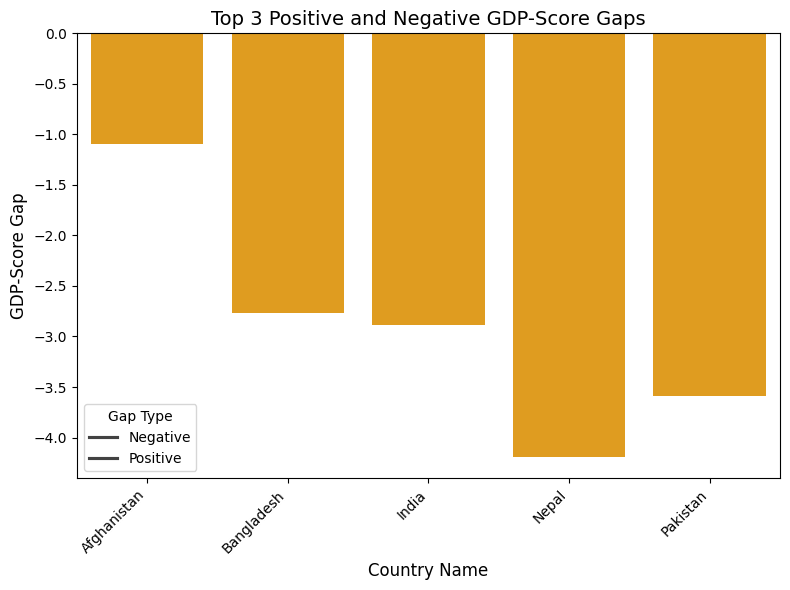

In [368]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=pd.concat([top_positive_gaps, top_negative_gaps]),
    x='Country name',
    y='GDP-Score Gap',
    hue=pd.concat([top_positive_gaps, top_negative_gaps])['GDP-Score Gap'] > 0,
    palette={True: 'green', False: 'orange'}
)
plt.title('Top 3 Positive and Negative GDP-Score Gaps', fontsize=14)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gap Type', labels=['Negative', 'Positive'], fontsize=10)
plt.tight_layout()
plt.show()

In [369]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
    "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

In [370]:
filtered_middle_east_data = data[data['Country name'].isin(middle_east_countries)]
filtered_middle_east_data.to_csv('middle_east_data.csv')

In [371]:
m_east_data = pd.read_csv('/content/middle_east_data.csv')

In [372]:
def descriptive_statistics(region, name):
    mean_score = region['score'].mean()
    std_score = region['score'].std()
    print(f"{name} - Mean Score: {mean_score:.2f}, Standard Deviation: {std_score:.2f}")
    return mean_score, std_score

middle_east_stats = descriptive_statistics(m_east_data, "Middle East")
south_asia_stats = descriptive_statistics(s_asian_data, "South Asia")


Middle East - Mean Score: 5.41, Standard Deviation: 1.57
South Asia - Mean Score: 3.90, Standard Deviation: 1.32


In [373]:

def top_bottom_performers(region, name):
    top_three = region.nlargest(3, 'score')
    bottom_three = region.nsmallest(3, 'score')
    print(f"\n{name} - Top 3 Countries:\n", top_three[['Country name', 'score']])
    print(f"{name} - Bottom 3 Countries:\n", bottom_three[['Country name', 'score']])
    return top_three, bottom_three

middle_east_top, middle_east_bottom = top_bottom_performers(m_east_data, "Middle East")
south_asia_top, south_asia_bottom = top_bottom_performers(s_asian_data, "South Asia")



Middle East - Top 3 Countries:
            Country name  score
0                Israel  7.341
1                Kuwait  6.951
2  United Arab Emirates  6.733
Middle East - Bottom 3 Countries:
   Country name  score
9      Lebanon  2.707
8        Yemen  3.561
7       Jordan  4.186

South Asia - Top 3 Countries:
   Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054
South Asia - Bottom 3 Countries:
   Country name  score
4  Afghanistan  1.721
3   Bangladesh  3.886
2        India  4.054


[Text(0, 0, 'Lebanon'), Text(1, 0, 'Yemen'), Text(2, 0, 'Jordan')]

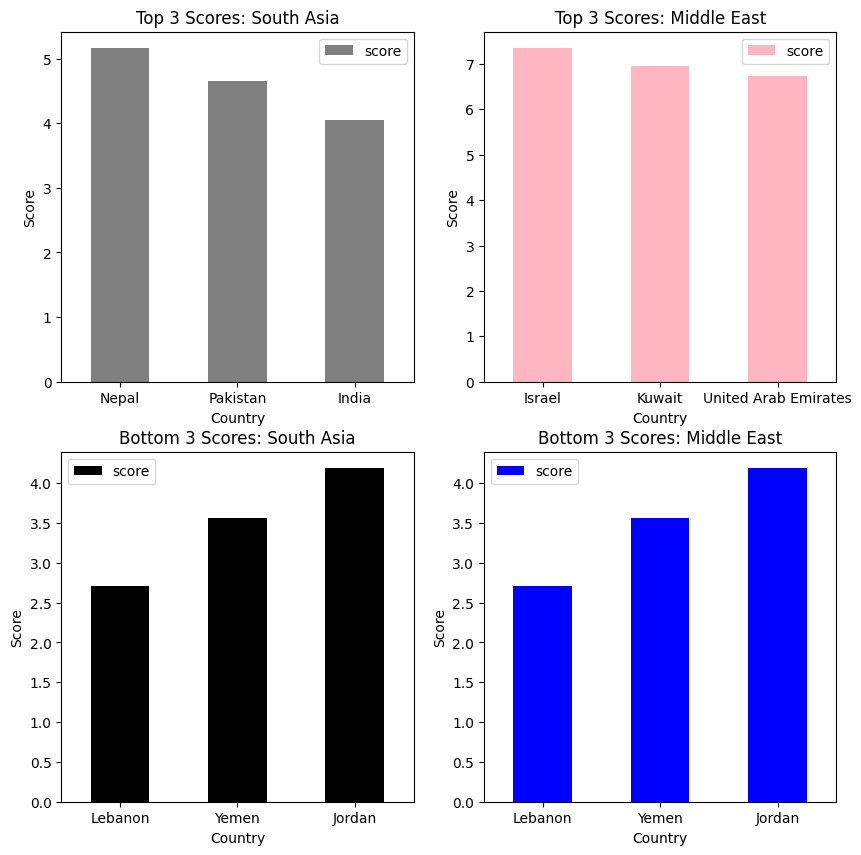

In [374]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))
south_asia_top.plot(kind='bar', x='Country name', y='score', ax=axes[0, 0], color='grey')
axes[0, 0].set_title('Top 3 Scores: South Asia')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=360)

# Top 3 Scores for Middle East (Second subplot)
middle_east_top.plot(kind='bar', x='Country name', y='score', ax=axes[0, 1], color='lightpink')
axes[0, 1].set_title('Top 3 Scores: Middle East')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(),rotation=360)

# Bottom 3 Scores for South Asia (Third subplot)
middle_east_bottom.plot(kind='bar', x='Country name', y='score', ax=axes[1, 0], color='black')
axes[1, 0].set_title('Bottom 3 Scores: South Asia')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=360)

# Bottom 3 Scores for Middle East (Fourth subplot)
middle_east_bottom.plot(kind='bar', x='Country name', y='score', ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Bottom 3 Scores: Middle East')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=360)

<Figure size 1000x600 with 0 Axes>

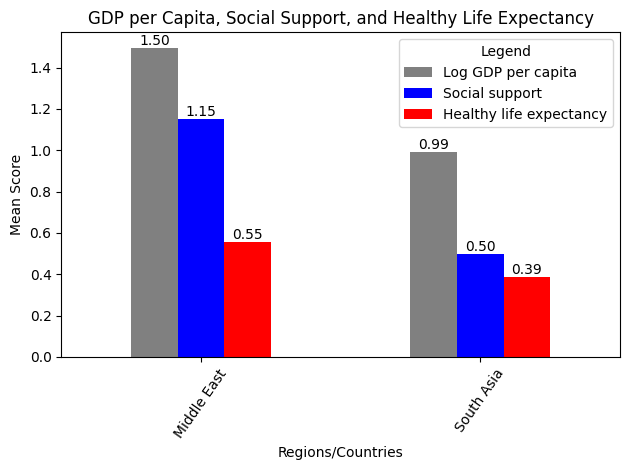

In [375]:
combined_data = pd.concat([
    s_asian_data.assign(Region='South Asia'),
    m_east_data.assign(Region='Middle East')
])
combined_data = combined_data[['Log GDP per capita','Social support','Healthy life expectancy','Region']]

pivot_data = combined_data.groupby('Region').mean()

plt.figure(figsize=(10, 6))
ax = pivot_data.plot(kind='bar', legend=False,color=['grey', 'blue', 'red'])
plt.legend(title='Legend', loc='upper right')
plt.title('GDP per Capita, Social Support, and Healthy Life Expectancy')
plt.xlabel('Regions/Countries')
plt.ylabel('Mean Score')
plt.xticks(rotation=55)  # Rotate x-axis labels for better readability
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
plt.show()

In [376]:
def data_disparity(region, name):
    score_range = region['score'].max() - region['score'].min()
    score_cv = (region['score'].std() / region['score'].mean()) * 100
    print(f"{name} - Range: {score_range:.2f}, Coefficient of Variation: {score_cv:.2f}%")
    return score_range, score_cv

middle_east_disparity = data_disparity(m_east_data, "Middle East")
south_asia_disparity = data_disparity(s_asian_data, "South Asia")

Middle East - Range: 4.63, Coefficient of Variation: 28.94%
South Asia - Range: 3.44, Coefficient of Variation: 33.79%


In [377]:
corr_life_choices_south_asia = s_asian_data['Freedom to make life choices'].corr(s_asian_data['score'],method='pearson')
corr_generosity_south_asia = s_asian_data['Generosity'].corr(s_asian_data['score'],method = 'pearson')

print(f"The correlation between Freedom to make life choices and score is: {corr_life_choices_south_asia:.2f}")
print(f"The correlation between Generosity and score is: {corr_generosity_south_asia:.2f}")


The correlation between Freedom to make life choices and score is: 0.80
The correlation between Generosity and score is: 0.88


In [378]:
corr_life_choices_middle_east = m_east_data['Freedom to make life choices'].corr(m_east_data['score'],method='pearson')
corr_generosity_middle_east = m_east_data['Generosity'].corr(m_east_data['score'],method = 'pearson')
print(f"The correlation between Freedom to make life choices and score is: {corr_life_choices_middle_east:.2f}")
print(f"The correlation between Generosity and score is: {corr_generosity_middle_east:.2f}")

The correlation between Freedom to make life choices and score is: 0.86
The correlation between Generosity and score is: 0.63


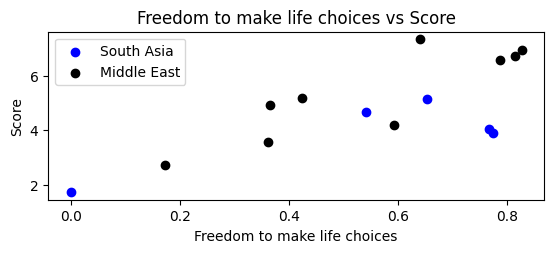

In [379]:
plt.subplot(2, 1, 1)
plt.scatter(s_asian_data['Freedom to make life choices'], s_asian_data['score'], label='South Asia', color='blue')
plt.scatter(m_east_data['Freedom to make life choices'], m_east_data['score'], label='Middle East', color='black')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')
plt.title('Freedom to make life choices vs Score')
plt.legend()

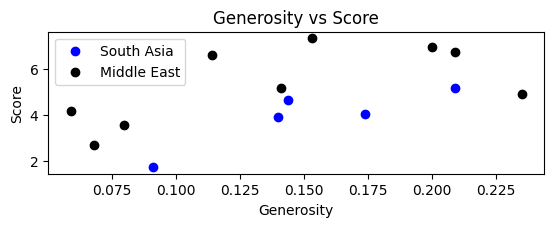

In [380]:
plt.subplot(2, 1, 2)
plt.scatter(s_asian_data['Generosity'], s_asian_data['score'], label='South Asia', color='blue')
plt.scatter(m_east_data['Generosity'], m_east_data['score'], label='Middle East', color='black')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.title('Generosity vs Score')
plt.subplots_adjust(hspace=0.6)
plt.legend()
plt.show()

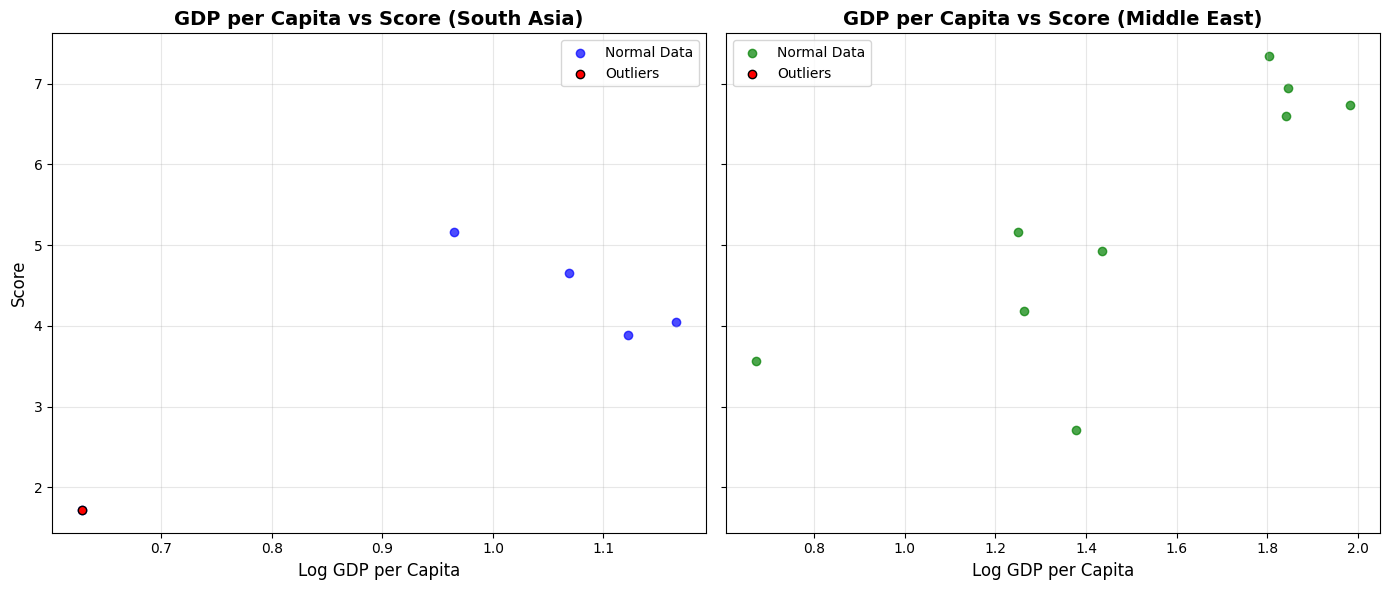

In [381]:
def find_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

outliers_south_asia = pd.concat([
    find_outliers(s_asian_data, 'score'),
    find_outliers(s_asian_data, 'Log GDP per capita')
]).drop_duplicates()

outliers_middle_east = pd.concat([
    find_outliers(m_east_data, 'score'),
    find_outliers(m_east_data, 'Log GDP per capita')
]).drop_duplicates()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].scatter(
    s_asian_data['Log GDP per capita'],
    s_asian_data['score'],
    color='blue', label='Normal Data', alpha=0.7
)
axes[0].scatter(
    outliers_south_asia['Log GDP per capita'],
    outliers_south_asia['score'],
    color='red', label='Outliers', edgecolor='black'
)
axes[0].set_title('GDP per Capita vs Score (South Asia)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Log GDP per Capita', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].grid(alpha=0.3)
axes[0].legend(fontsize=10)


axes[1].scatter(
    m_east_data['Log GDP per capita'],
    m_east_data['score'],
    color='green', label='Normal Data', alpha=0.7
)
axes[1].scatter(
    outliers_middle_east['Log GDP per capita'],
    outliers_middle_east['score'],
    color='red', label='Outliers', edgecolor='black'
)
axes[1].set_title('GDP per Capita vs Score (Middle East)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Log GDP per Capita', fontsize=12)
axes[1].grid(alpha=0.3)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

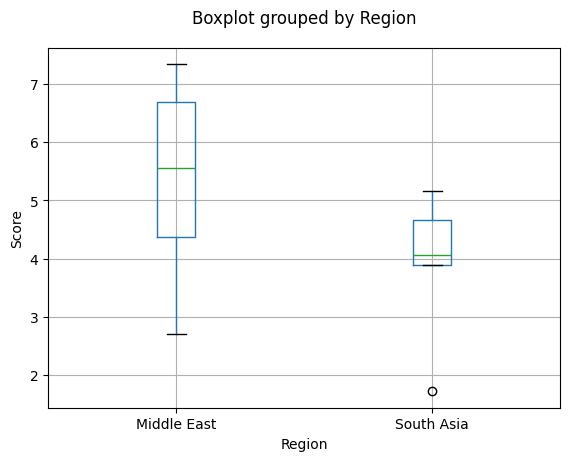

In [382]:
s_asian_data['Region'] ='South Asia'
m_east_data['Region'] = 'Middle East'
combined_data = pd.concat([s_asian_data, m_east_data])
plt.figure(figsize=(8, 6))
combined_data.boxplot(column='score',by='Region')
plt.title('')
plt.ylabel('Score')
plt.show()

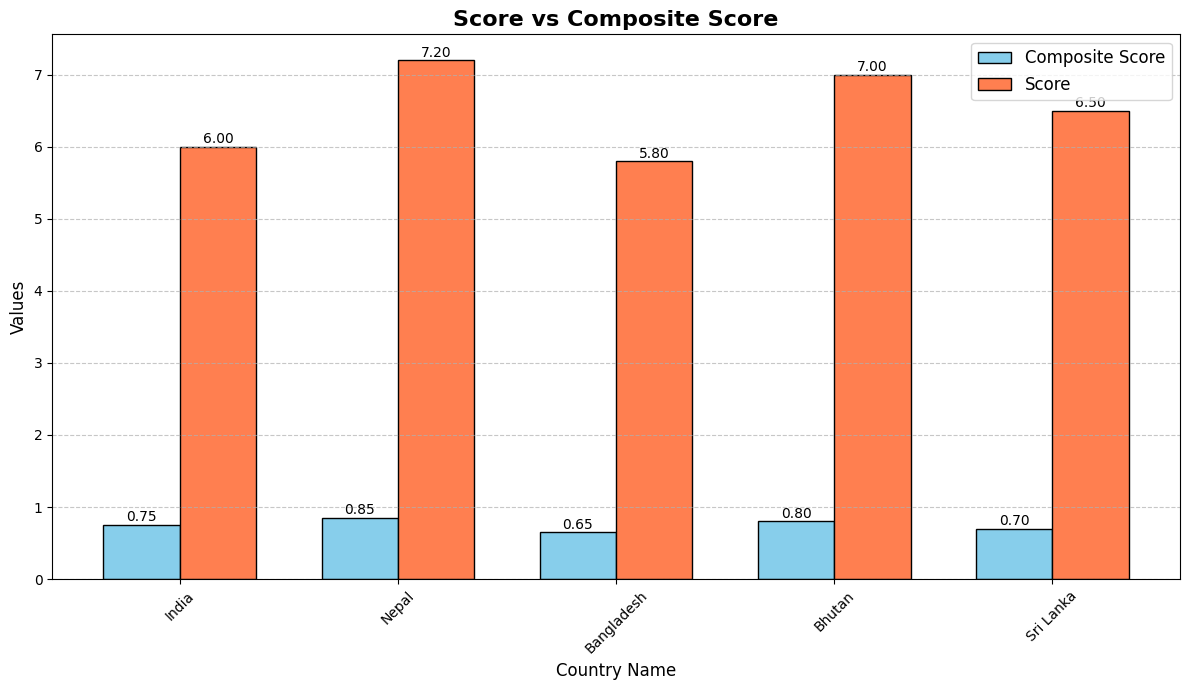

In [383]:
s_asian_data = pd.DataFrame({
    'Country name': ['India', 'Nepal', 'Bangladesh', 'Bhutan', 'Sri Lanka'],
    'Composite Score': [0.75, 0.85, 0.65, 0.80, 0.70],
    'Score': [6.0, 7.2, 5.8, 7.0, 6.5]
})
plt.figure(figsize=(12, 7))
width = 0.35

x = range(len(s_asian_data))


bars1 = plt.bar(x, s_asian_data['Composite Score'], width, label='Composite Score',
                color='skyblue', edgecolor='black')


bars2 = plt.bar([p + width for p in x], s_asian_data['Score'], width, label='Score',
                color='coral', edgecolor='black')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             f'{bar.get_height():.2f}', ha='center', fontsize=10, color='black')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             f'{bar.get_height():.2f}', ha='center', fontsize=10, color='black')


plt.title('Score vs Composite Score', fontsize=16, fontweight='bold')
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks([p + width / 2 for p in x], s_asian_data['Country name'], fontsize=10, rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
